Question 1 [10 marks]

In [257]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
seed_value = 1
firing_rate = 35  # Hz
duration = 1  # seconds
refractory_period = 0.005  # 5 ms in seconds

(i) Write code to generate spikes using a Poisson process and sample a homo-geneous Poisson spike train with firing rate of 35 Hz.

In [258]:
def generate_homogeneous_poisson_spike_train(rate, duration, seed=None):
    """
    Generate a homogeneous Poisson spike train.

    Parameters:
    - rate: Firing rate (Hz)
    - duration: Duration of the spike train (seconds)

    Returns:
    - spikes: Array of spike times
    """
    if seed is not None:
        np.random.seed(seed)

    # Calculate the expected time interval between spikes
    interval = 1 / rate

    # Generate spike times using exponential distribution
    spikes = []
    current_time = 0
    while current_time < duration:
        isi = np.random.exponential(interval)  # Inter-spike interval
        current_time += isi
        if current_time < duration:
            spikes.append(current_time)

    return np.array(spikes)

# Generate the spike train
homogeneous_spike_train = generate_homogeneous_poisson_spike_train(firing_rate, duration, seed=seed_value)


(ii) Extend your code to sample from an inhomogeneous Poisson neuron that has a 5 ms absolute refractory period, keeping the overall firing rate at 35 Hz (35 spikes per second).

In [259]:
def generate_inhomogeneous_poisson_spike_train(rate, duration, refractory_period, seed=None):
    """
    Generate an inhomogeneous Poisson spike train with an absolute refractory period.

    Parameters:
    - rate: Desired overall firing rate (Hz)
    - duration: Duration of the spike train (seconds)
    - refractory_period: Absolute refractory period (seconds)

    Returns:
    - spikes: Array of spike times
    """
    if seed is not None:
        np.random.seed(seed)

    # Calculate the expected interval between spikes without refractory period
    interval = 1 / rate

    # Generate spike times while respecting the refractory period
    spikes = []
    current_time = 0
    while current_time < duration:
        isi = np.random.exponential(interval)  # Inter-spike interval
        next_spike = current_time + isi

        # Add the refractory period constraint
        if not spikes or (next_spike - spikes[-1]) >= refractory_period:
            current_time = next_spike
            if current_time < duration:
                spikes.append(current_time)

    return np.array(spikes)

# Generate the spike train
inhomogeneous_spike_train = generate_inhomogeneous_poisson_spike_train(firing_rate, duration, refractory_period, seed=seed_value)

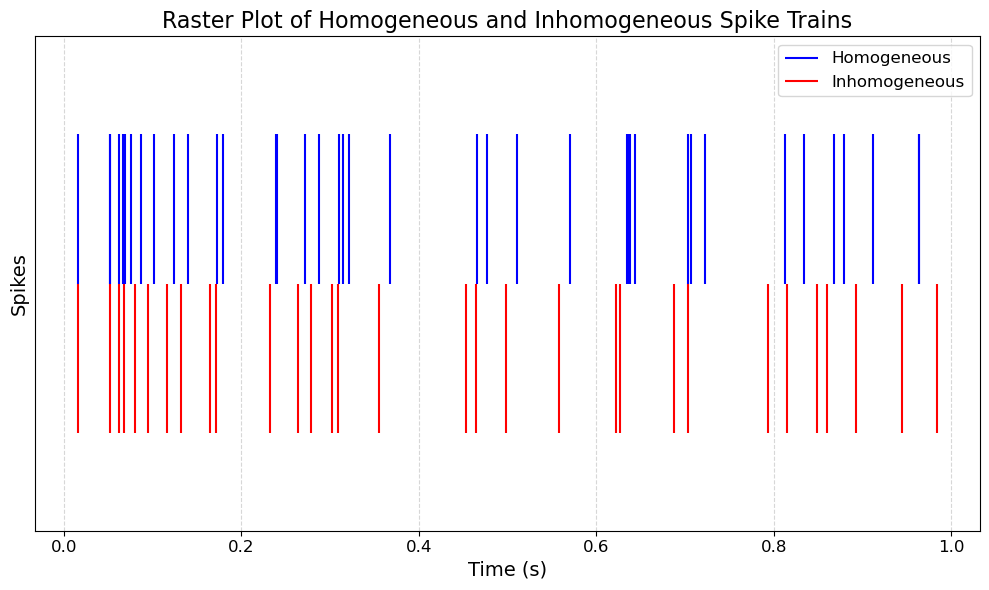

In [260]:
def plot_spike_trains(homogeneous_spike_train, inhomogeneous_spike_train, firing_rate, refractory_period):
    """
    Plots the homogeneous and inhomogeneous spike trains on the same raster plot.

    Parameters:
    - homogeneous_spike_train: List or array of spike times for the homogeneous spike train.
    - inhomogeneous_spike_train: List or array of spike times for the inhomogeneous spike train.
    - firing_rate: Firing rate in Hz for the homogeneous spike train.
    - refractory_period: Refractory period in seconds for the inhomogeneous spike train.
    """
    plt.figure(figsize=(10, 6))

    # Plot homogeneous spike train
    plt.eventplot(homogeneous_spike_train, lineoffsets=1, colors='blue', label="Homogeneous")

    # Plot inhomogeneous spike train
    plt.eventplot(inhomogeneous_spike_train, lineoffsets=0, colors='red', label="Inhomogeneous")

    # Customize plot
    plt.xlabel("Time (s)", fontsize=14)  # X-axis label font size
    plt.ylabel("Spikes", fontsize=14)    # Y-axis label font size
    plt.title("Raster Plot of Homogeneous and Inhomogeneous Spike Trains", fontsize=16)  # Title font size
    plt.legend(loc="upper right", fontsize=12)  # Legend font size
    plt.xticks(fontsize=12)  # X-axis tick font size
    # Remove y-axis ticks and labels
    plt.yticks([], [])
    plt.grid(True, linestyle="--", alpha=0.5)  # Optional grid
    plt.tight_layout()
    plt.show()

plot_spike_trains(homogeneous_spike_train, inhomogeneous_spike_train, firing_rate, refractory_period)

(iii) Calculate the spike-count Fano factor and ISI coefficient of variation for the homogeneous and refractory-inhomogeneous neurons sampled in parts i and ii. In the case of the Fano factor the count should be performed over windows of width 10 ms, 50 ms and 100 ms.

Homogeneous Fano Factors: {0.01: 1.2214452214452216, 0.05: 1.3229018492176383, 0.1: 0.7222222222222222}
Inhomogeneous Fano Factors: {0.01: 0.8804170739654609, 0.05: 0.7543859649122805, 0.1: 0.5363984674329502}
Homogeneous CV: 1.0041200974167381
Inhomogeneous CV: 0.754119101638479


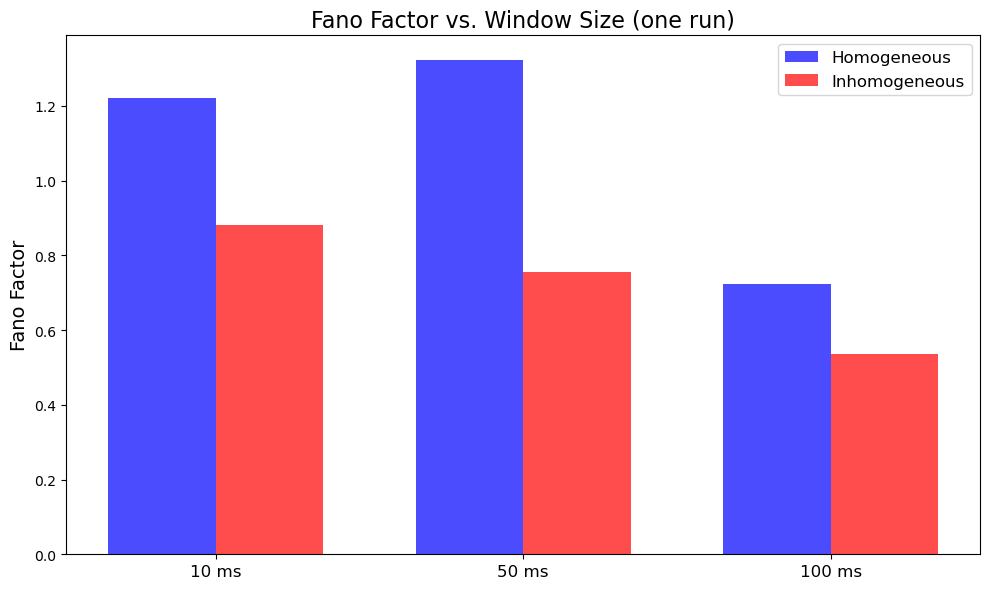

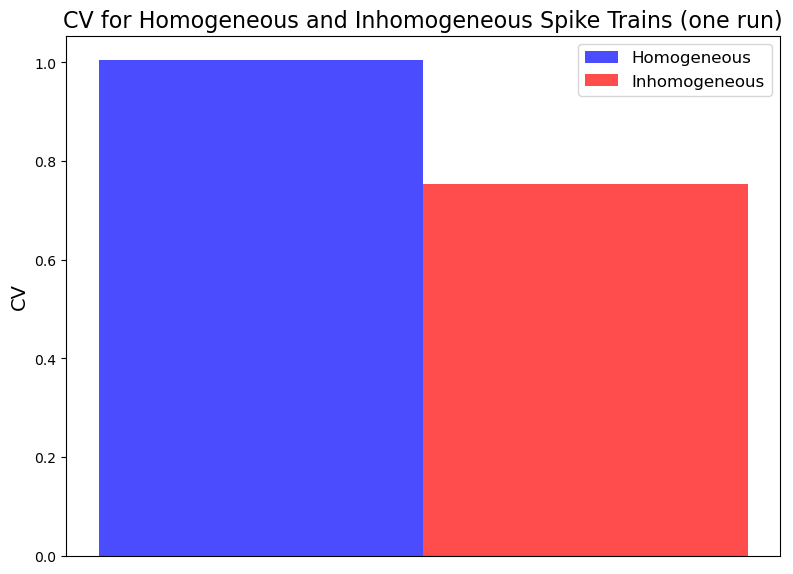

In [261]:
# Generate the spike trains
homogeneous_spike_train = generate_homogeneous_poisson_spike_train(firing_rate, duration, seed=seed_value)
inhomogeneous_spike_train = generate_inhomogeneous_poisson_spike_train(firing_rate, duration, refractory_period, seed=seed_value)

# Function to calculate Fano factor
def calculate_fano_factor(spike_times, window_sizes, duration):
    fano_factors = {}
    for window_size in window_sizes:
        bins = np.arange(0, duration, window_size)
        spike_counts, _ = np.histogram(spike_times, bins)
        variance = np.var(spike_counts)
        mean = np.mean(spike_counts)
        fano_factors[window_size] = variance / mean if mean > 0 else np.nan
    return fano_factors

# Function to calculate ISI Coefficient of Variation
def calculate_isi_cv(spike_times):
    isi = np.diff(spike_times)
    cv = np.std(isi) / np.mean(isi) if np.mean(isi) > 0 else np.nan
    return cv

# Calculate Fano factors for different window sizes
window_sizes = [0.01, 0.05, 0.1]  # 10 ms, 50 ms, 100 ms
homogeneous_fano = calculate_fano_factor(homogeneous_spike_train, window_sizes, duration)
inhomogeneous_fano = calculate_fano_factor(inhomogeneous_spike_train, window_sizes, duration)

# Calculate ISI Coefficient of Variation
homogeneous_cv = calculate_isi_cv(homogeneous_spike_train)
inhomogeneous_cv = calculate_isi_cv(inhomogeneous_spike_train)

print("Homogeneous Fano Factors:", homogeneous_fano)
print("Inhomogeneous Fano Factors:", inhomogeneous_fano)
print("Homogeneous CV:", homogeneous_cv)
print("Inhomogeneous CV:", inhomogeneous_cv)


def plot_results(homogeneous_fano, inhomogeneous_fano, homogeneous_cv, inhomogeneous_cv, window_sizes):
    """
    Creates two separate plots:
    - One for Fano factors across window sizes.
    - Another for ISI Coefficient of Variation (CV).
    """
    window_labels = [f"{int(w * 1000)} ms" for w in window_sizes]  # Convert to ms for labels
    homogeneous_fano_values = [homogeneous_fano[w] for w in window_sizes]
    inhomogeneous_fano_values = [inhomogeneous_fano[w] for w in window_sizes]

    # Bar positions
    x = np.arange(len(window_sizes))  # Positions for each group
    width = 0.35  # Width of each bar

    # First Plot: Fano Factor Across Window Sizes
    plt.figure(figsize=(10, 6))
    plt.bar(x - width / 2, homogeneous_fano_values, width, label="Homogeneous", color="blue", alpha=0.7)
    plt.bar(x + width / 2, inhomogeneous_fano_values, width, label="Inhomogeneous", color="red", alpha=0.7)
    plt.title("Fano Factor vs. Window Size (one run)", fontsize=16)
    plt.ylabel("Fano Factor", fontsize=14)
    plt.xticks(x, window_labels, fontsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

    # Second Plot: ISI Coefficient of Variation
    plt.figure(figsize=(8, 6))

    # Define bar positions and width
    x = np.arange(1)  # Single group for Homogeneous and Inhomogeneous
    width = 0.4  # Smaller width to remove gap

    # Plot the bars
    plt.bar(x - width / 2, [homogeneous_cv], width, color="blue", alpha=0.7, label="Homogeneous")
    plt.bar(x + width / 2, [inhomogeneous_cv], width, color="red", alpha=0.7, label="Inhomogeneous")

    # Add labels, title, and legend
    plt.ylabel("CV", fontsize=14)
    plt.title("CV for Homogeneous and Inhomogeneous Spike Trains (one run)", fontsize=16)
    plt.legend(fontsize=12)
    plt.tight_layout()

    # Remove x-axis ticks and labels
    plt.xticks([], [])

    # Show the plot
    plt.show()


# Plot the results
plot_results(homogeneous_fano, inhomogeneous_fano, homogeneous_cv, inhomogeneous_cv, window_sizes)


Why does Fano Factor decrease as window size increases?
The Fano Factor decreases with increasing window size because larger windows smooth out short-term fluctuations

Why does a homogeneous Poisson process have a higher Fano Factor?
In an inhomogeneous Poisson process with a refractory period:

Constraint: After a spike occurs, no spike can occur during the refractory period. This introduces a temporal dependency between spikes.
The constraint prevents spikes from being too close in time, which:
Smooths out fluctuations in spike timing.
Reduces the probability of clusters of spikes occurring in short time intervals.
This constraint suppresses the variance of spike counts.
The refractory period acts like a "buffer zone" that limits when a spike can occur after a previous one. This reduces the range of possibilities for the timing of spikes.

What does a homogeneous Poisson process have a CV of 1?
Because its purely random

Why does an inhomogeneous Poisson process have a CV lower than 1?
This introduces structure or periodicity, which reduces randomness compared to a homogeneous process.

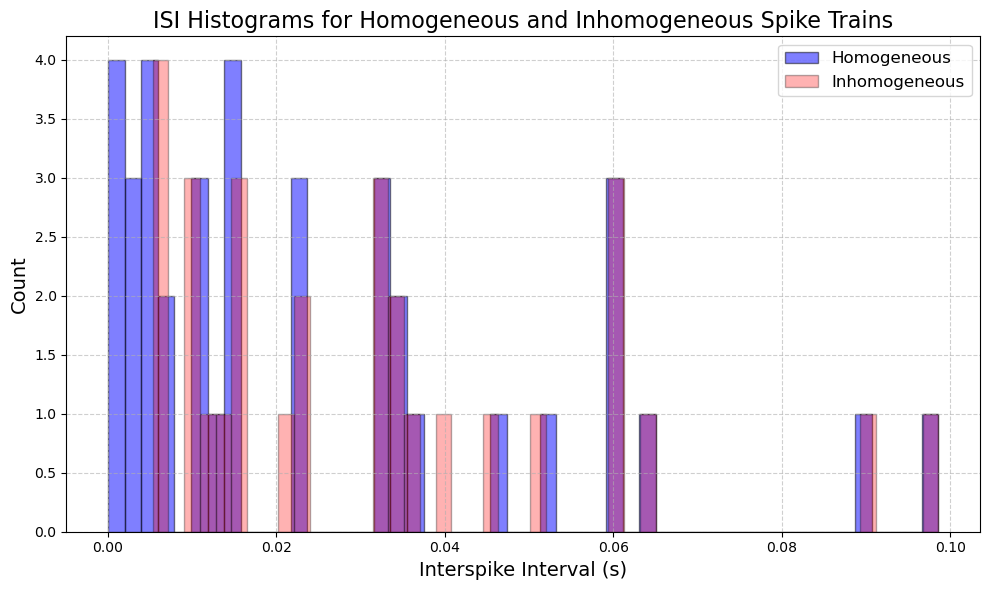

In [262]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate ISIs for both spike trains
def calculate_isi(spike_train):
    return np.diff(spike_train)

homogeneous_isi = calculate_isi(homogeneous_spike_train)
inhomogeneous_isi = calculate_isi(inhomogeneous_spike_train)

# Plot overlaid histograms for ISIs
plt.figure(figsize=(10, 6))

# Homogeneous ISI histogram
plt.hist(
    homogeneous_isi, 
    bins=50, 
    color="blue", 
    alpha=0.5, 
    edgecolor="black", 
    label="Homogeneous"
)

# Inhomogeneous ISI histogram
plt.hist(
    inhomogeneous_isi, 
    bins=50, 
    color="red", 
    alpha=0.3, 
    edgecolor="black", 
    label="Inhomogeneous"
)

# Add title, labels, and legend
plt.title("ISI Histograms for Homogeneous and Inhomogeneous Spike Trains", fontsize=16)
plt.xlabel("Interspike Interval (s)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()


(iv) Plot how the ISI coefficient of variation and spike-count Fano factor in 100 ms bins change over refractory periods ranging from 0 to 28 milliseconds.

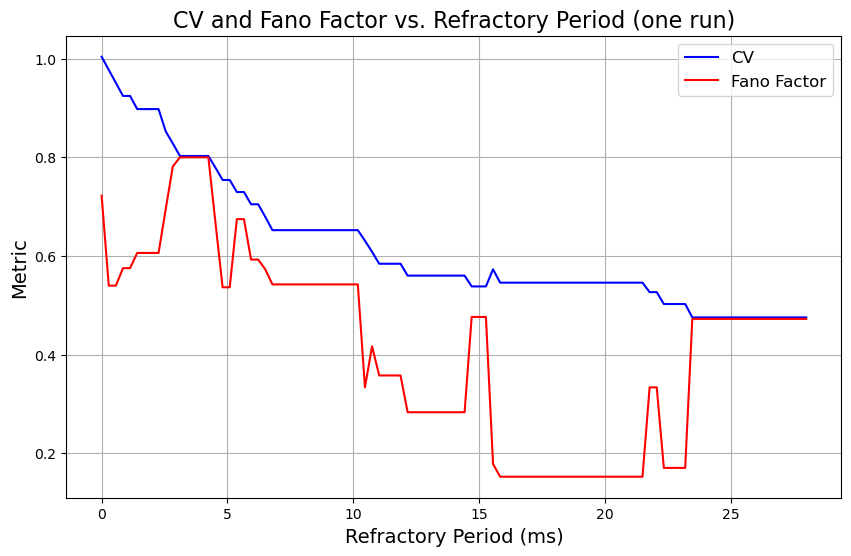

In [263]:
# Parameters for this simulation
refractory_periods = np.linspace(0, 0.028, 100)  # Refractory periods from 0 to 28 ms
bin_size = 0.1  # 100 ms bin size

# Arrays to store results
isi_cvs = []
fano_factors = []

# Simulate for each refractory period
for refractory_period in refractory_periods:
    spike_times = generate_inhomogeneous_poisson_spike_train(firing_rate, duration, refractory_period, seed=seed_value)
    isi_cvs.append(calculate_isi_cv(spike_times))
    fano_factors.append(calculate_fano_factor(spike_times, [bin_size], duration)[bin_size])

# Plot ISI CV and Fano Factor on the same graph
plt.figure(figsize=(10, 6))

# Plot ISI CV
plt.plot(refractory_periods * 1000, isi_cvs, label="CV", color="blue", linestyle="-")

# Plot Fano Factor
plt.plot(refractory_periods * 1000, fano_factors, label="Fano Factor", color="red", linestyle="-")

# Add labels, title, and legend
plt.xlabel("Refractory Period (ms)", fontsize=14)
plt.ylabel("Metric", fontsize=14)
plt.title("CV and Fano Factor vs. Refractory Period (one run)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

Homogeneous Fano Factors (averaged ): {0.01: 1.000992393425835, 0.05: 0.9907535237635097, 0.1: 1.0055643450718799}
Inhomogeneous Fano Factors: {0.01: 0.9285359171713222, 0.05: 0.9090021945064544, 0.1: 0.9146918161625536}
Homogeneous CV: 0.9922479191836645
Inhomogeneous CV: 0.9465384208800213


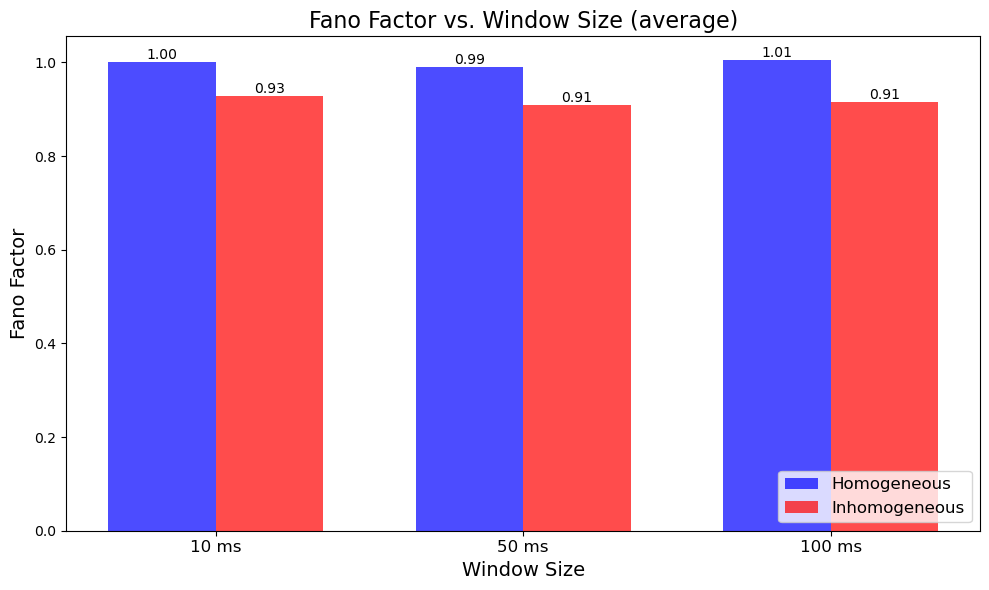

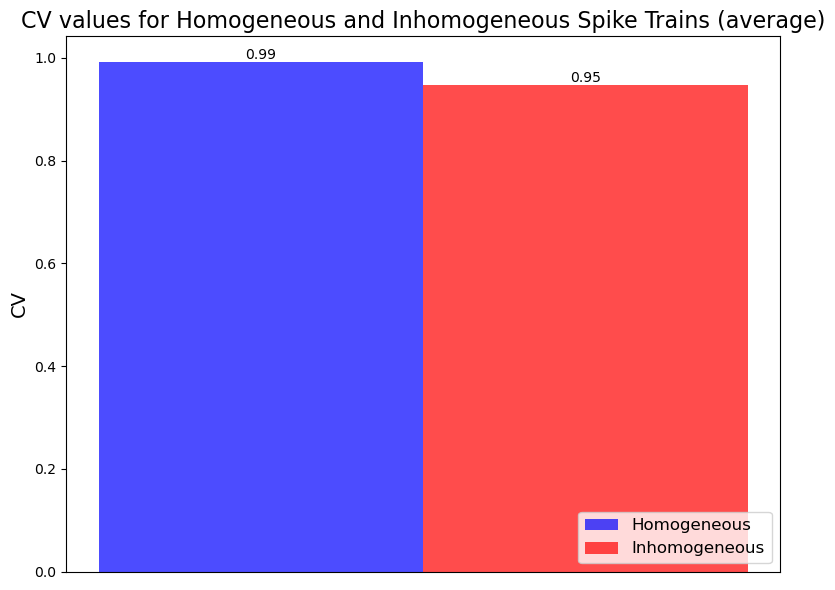

In [264]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
duration = 10.0  # in seconds
rate = 10  # spikes per second
window_sizes = [0.01, 0.05, 0.1]  # 10 ms, 50 ms, 100 ms
seeds = range(200, 300)  # Random seeds for averaging
refractory_period = 0.005

# Compute metrics across seeds
homogeneous_fano_all = []
inhomogeneous_fano_all = []
homogeneous_cv_all = []
inhomogeneous_cv_all = []

for seed in seeds:
    homogeneous_spike_train = generate_homogeneous_poisson_spike_train(rate, duration, seed)
    inhomogeneous_spike_train = generate_inhomogeneous_poisson_spike_train(rate, duration, refractory_period, seed)

    homogeneous_fano = calculate_fano_factor(homogeneous_spike_train, window_sizes, duration)
    inhomogeneous_fano = calculate_fano_factor(inhomogeneous_spike_train, window_sizes, duration)

    homogeneous_fano_all.append(homogeneous_fano)
    inhomogeneous_fano_all.append(inhomogeneous_fano)

    homogeneous_cv_all.append(calculate_isi_cv(homogeneous_spike_train))
    inhomogeneous_cv_all.append(calculate_isi_cv(inhomogeneous_spike_train))

# Average results across seeds
average_homogeneous_fano = {w: np.mean([f[w] for f in homogeneous_fano_all]) for w in window_sizes}
average_inhomogeneous_fano = {w: np.mean([f[w] for f in inhomogeneous_fano_all]) for w in window_sizes}
average_homogeneous_cv = np.mean(homogeneous_cv_all)
average_inhomogeneous_cv = np.mean(inhomogeneous_cv_all)

print("Homogeneous Fano Factors (averaged ):", average_homogeneous_fano)
print("Inhomogeneous Fano Factors:", average_inhomogeneous_fano)
print("Homogeneous CV:", average_homogeneous_cv)
print("Inhomogeneous CV:", average_inhomogeneous_cv)

def plot_results(average_homogeneous_fano, average_inhomogeneous_fano, average_homogeneous_cv, average_inhomogeneous_cv, window_sizes):
    window_labels = [f"{int(w * 1000)} ms" for w in window_sizes]
    homogeneous_fano_values = [average_homogeneous_fano[w] for w in window_sizes]
    inhomogeneous_fano_values = [average_inhomogeneous_fano[w] for w in window_sizes]

    x = np.arange(len(window_sizes))  # Bar positions
    width = 0.35  # Bar width

    # Fano Factor Plot
    plt.figure(figsize=(10, 6))
    bars1 = plt.bar(x - width / 2, homogeneous_fano_values, width, label="Homogeneous", color="blue", alpha=0.7)
    bars2 = plt.bar(x + width / 2, inhomogeneous_fano_values, width, label="Inhomogeneous", color="red", alpha=0.7)

    # Annotate Fano Factor values on bars
    for bar in bars1:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.2f}", ha='center', va='bottom', fontsize=10)
    for bar in bars2:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.2f}", ha='center', va='bottom', fontsize=10)

    plt.title("Fano Factor vs. Window Size (average)", fontsize=16)
    plt.ylabel("Fano Factor", fontsize=14)
    plt.xlabel("Window Size", fontsize=14)
    plt.xticks(x, window_labels, fontsize=12)
    plt.legend(fontsize=12, loc='lower right')
    plt.tight_layout()
    plt.show()

    # ISI CV Plot
    plt.figure(figsize=(8, 6))

    x = np.arange(1)  # Single group for Homogeneous and Inhomogeneous
    width = 0.4

    bars1 = plt.bar(x - width / 2, [average_homogeneous_cv], width, color="blue", alpha=0.7, label="Homogeneous")
    bars2 = plt.bar(x + width / 2, [average_inhomogeneous_cv], width, color="red", alpha=0.7, label="Inhomogeneous")

    # Annotate CV values on bars
    for bar in bars1:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.2f}", ha='center', va='bottom', fontsize=10)
    for bar in bars2:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.2f}", ha='center', va='bottom', fontsize=10)

    plt.ylabel("CV", fontsize=14)
    plt.title("CV values for Homogeneous and Inhomogeneous Spike Trains (average)", fontsize=16)
    plt.legend(fontsize=12, loc='lower right')

    # Remove x-axis ticks and labels
    plt.xticks([], [])
    plt.tight_layout()
    plt.show()

plot_results(average_homogeneous_fano, average_inhomogeneous_fano, average_homogeneous_cv, average_inhomogeneous_cv, window_sizes)



Why does the introduction of a refractory period cause variation to increase?

A refractory period prevents spikes from occurring too close together, disrupting the natural randomness of the Poisson process.
This forces spikes to spread out unevenly, creating clusters of activity followed by periods of suppression, which increases variability in both spike counts and ISIs.
Why does this variation increase more with a larger window size?

Larger windows capture longer sequences of activity, including both the clustered spikes (due to bursts) and the suppressed periods.
The longer the window, the more the refractory period's uneven effects accumulate, amplifying the variability compared to smaller windows.

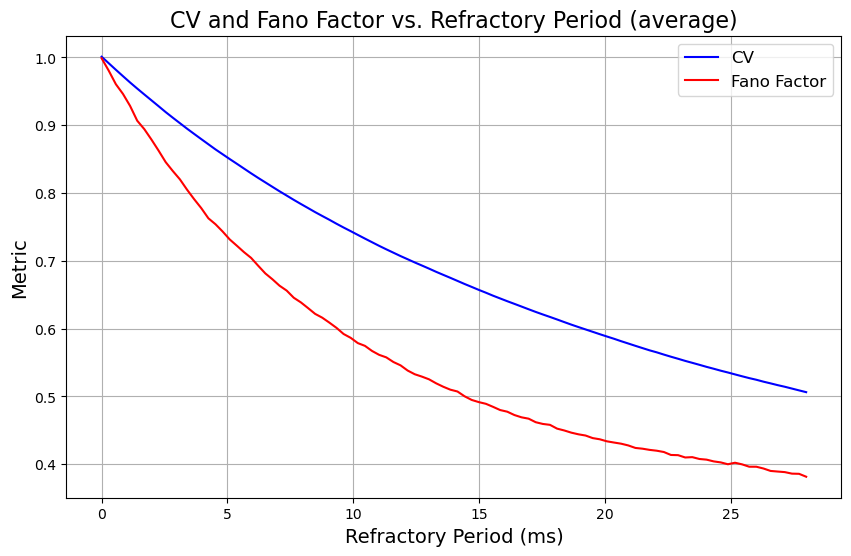

In [265]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
firing_rate = 35  # Hz
duration = 100  # seconds
refractory_periods = np.linspace(0, 0.028, 100)  # 0 to 28 ms
bin_size = 0.05  # 100 ms bin size
num_seeds = 100  # Number of seeds for averaging

# Arrays to store results
isi_cvs = []
fano_factors = []

# Simulate for each refractory period with averaging
for refractory_period in refractory_periods:
    isi_cv_seeds = []
    fano_factor_seeds = []
    for seed in range(num_seeds):
        spike_times = generate_inhomogeneous_poisson_spike_train(firing_rate, duration, refractory_period, seed=seed)
        isi_cv_seeds.append(calculate_isi_cv(spike_times))
        fano_factor_seeds.append(calculate_fano_factor(spike_times, [bin_size], duration)[bin_size])
    isi_cvs.append(np.mean(isi_cv_seeds))
    fano_factors.append(np.mean(fano_factor_seeds))

# Plot results
plt.figure(figsize=(10, 6))

# Plot ISI CV
plt.plot(refractory_periods * 1000, isi_cvs, label="CV", color="blue", linestyle="-")

# Plot Fano Factor
plt.plot(refractory_periods * 1000, fano_factors, label="Fano Factor", color="red", linestyle="-")

# Add labels, title, and legend
plt.xlabel("Refractory Period (ms)", fontsize=14)
plt.ylabel("Metric", fontsize=14)
plt.title("CV and Fano Factor vs. Refractory Period (average)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()
